<h1>Cocke–Younger–Kasami algorithm</h1>

Loading matplotlib for graphics

In [ ]:
!python3 -m pip install matplotlib

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

The `check` is the string under test

The `grammar` is the context-free grammar rendered into Chomsky normal form (CNF)

The `start` keeps the set of initial symbols 

The `n` keeps the length of the tested string

In [6]:
check = "aabb"

grammar = [
    {"S": ("A", "C")},
    {"S": ("A", "B")},
    {"C": ("S", "B")},
    {"A": "a"},
    {"B": "b"}
]

start = ["S"]
n = len(check)

Now we split the rules
<br>
<br>
`final` variable will contain rules like A -> a
<br>
`nfinal` variable will contain rules like A -> BC </p> 

In [7]:
final = []
nfinal = []

for gr in grammar:
    [[left, right]] = gr.items()
    if len(right) == 1:
        final.append(gr)
    else:
        nfinal.append(gr)


Now we initialize a NxN matrix `P` to keep the result triangle

In [29]:
P = [[[] for row in range(n)] for x in range(n)]

The first loop places A -> a in the first line

In [30]:
for i in range(n):
    for j in range(len(final)): 
        [[left, right]] = final[j].items()
        if check[i] in right:
            P[0][i].append(left)

Now we fill up the rest of the triangle

In [31]:
for i in range(1, n):
    for j in range(n-i):
        for k in range(i):
            for nf in nfinal:
                [[left, right]] = nf.items()
                if right[0] in P[k][j] and right[1] in P[i-k-1][j+k+1]:
                    P[i][j].append(left)

Checking if the tested word belongs to the language and ploting the result triangle

The tested word was recognised


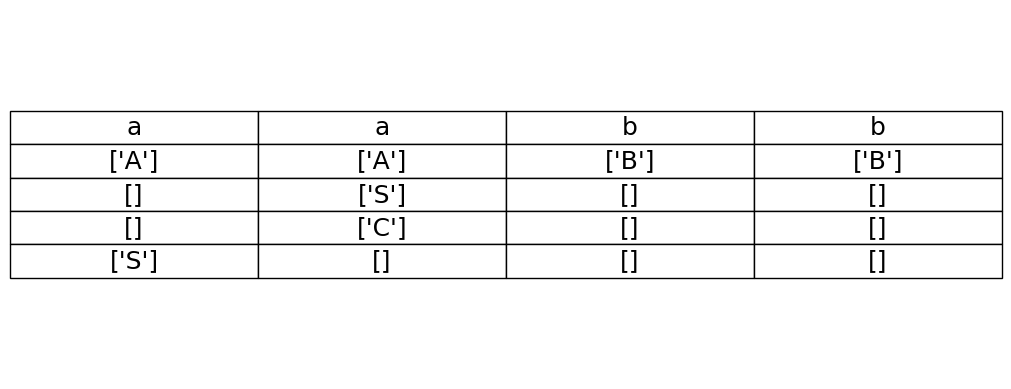

In [34]:
result = False
for i in P[n-1][0]:
    if i in start:
        result = True
        break

if result:
    print("The tested word was recognised")
else:
    print("The tested word was not recognised")

fig, axs = plt.subplots(1,1)

table = axs.table(cellText=P, colLabels=list(check), fontsize=80, loc='center', cellLoc='center')
table.set_fontsize(18)
table.scale(2, 2)

plt.axis('off')
plt.show()